In [8]:
# Core Libraries
import numpy as np
import pandas as pd
import random
import math
import math as mt

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics and Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import silhouette_score, silhouette_samples

# Statistical Modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Association Rule Mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Other Utilities
import re
import warnings
from math import exp
from math import log as LOG

In [10]:
# Load the first dataset
data1 = pd.read_csv('../Data/application_record.csv')

# Preview the first 5 rows of the dataset
print("First 5 rows of Dataset 1:")
print(data1.head())

First 5 rows of Dataset 1:
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Re

In [11]:
# Load the second dataset
data2 = pd.read_csv('../Data/credit_record.csv')

# Preview the first 5 rows of the second dataset
print("\nFirst 5 rows of Dataset 2:")
print(data2.head())


First 5 rows of Dataset 2:
        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C


In [14]:
# Merge the two datasets on the common column
merged_data = pd.merge(data1, data2, on='ID')

# Preview the first 5 rows of the merged dataset
print("\nFirst 5 rows of the merged dataset:")
print(merged_data.head())


First 5 rows of the merged dataset:
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHO

In [16]:
# Check the structure and details of the merged dataset
print("\nMerged Dataset Information:")
print(merged_data.info())


Merged Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  i

In [18]:
# Save the merged dataset as a new CSV file
merged_data.to_csv('../Data/merged_dataset.csv', index=False)
print("\nMerged dataset saved as '../Data/merged_dataset.csv'")


Merged dataset saved as '../Data/merged_dataset.csv'


In [19]:
# Preview the first few rows of the dataset
print("First 5 rows of the merged dataset:")
print(merged_data.head())

First 5 rows of the merged dataset:
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHON

In [20]:
# Check the dataset's structure and types of columns
print("\nDataset Information:")
print(merged_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  


In [21]:
# Get summary statistics for numerical columns
print("\nSummary Statistics:")
print(merged_data.describe())


Summary Statistics:
                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  7.777150e+05  777715.000000      7.777150e+05  777715.000000   
mean   5.078743e+06       0.428082      1.885348e+05  -16124.937046   
std    4.180442e+04       0.745755      1.016225e+05    4104.304018   
min    5.008804e+06       0.000000      2.700000e+04  -25152.000000   
25%    5.044568e+06       0.000000      1.215000e+05  -19453.000000   
50%    5.069530e+06       0.000000      1.620000e+05  -15760.000000   
75%    5.115551e+06       1.000000      2.250000e+05  -12716.000000   
max    5.150487e+06      19.000000      1.575000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  777715.000000    777715.0    777715.000000  777715.000000   
mean    57775.825016         1.0         0.231818       0.300965   
std    136471.735391         0.0         0.421993       0.458678   
min    -15713.000000         1.0         0.000000       0.000000   

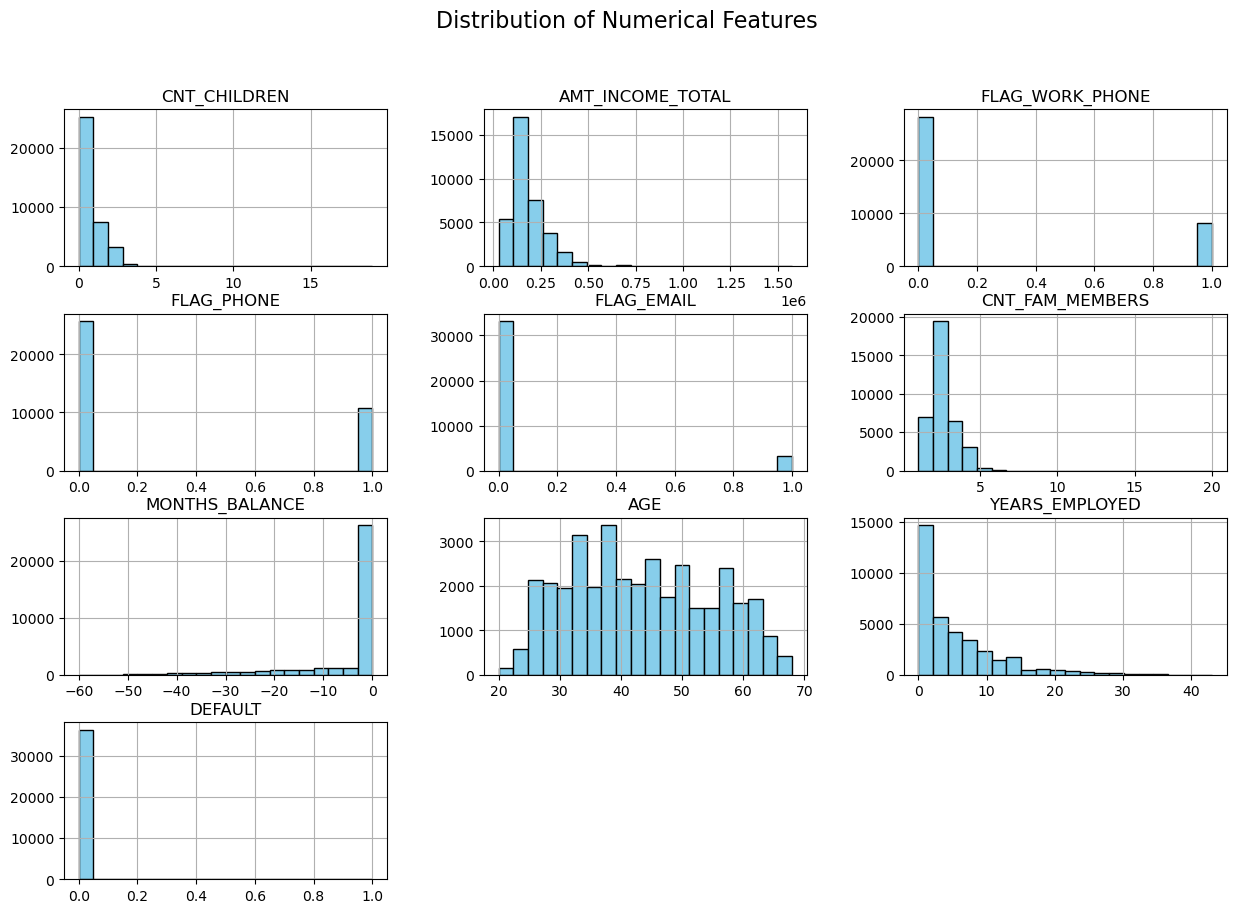

In [94]:
# Select numerical columns
numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
merged_data[numerical_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

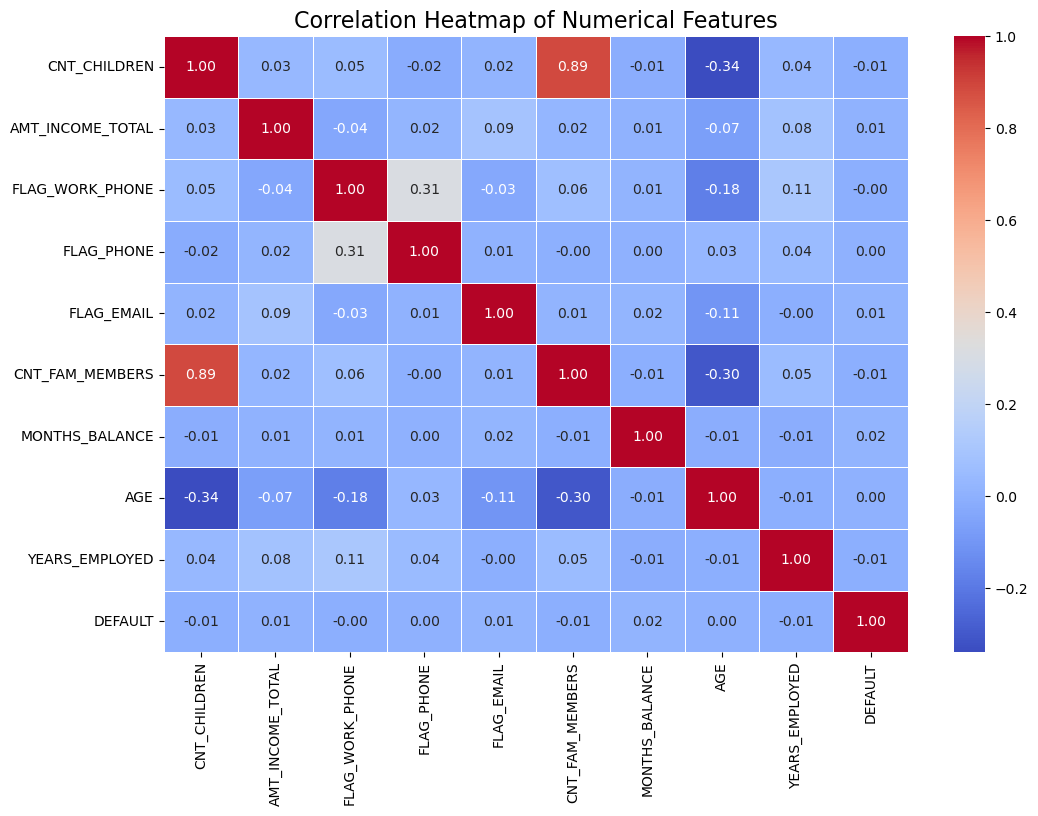

In [102]:
# Calculate correlations for numerical columns
numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = merged_data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

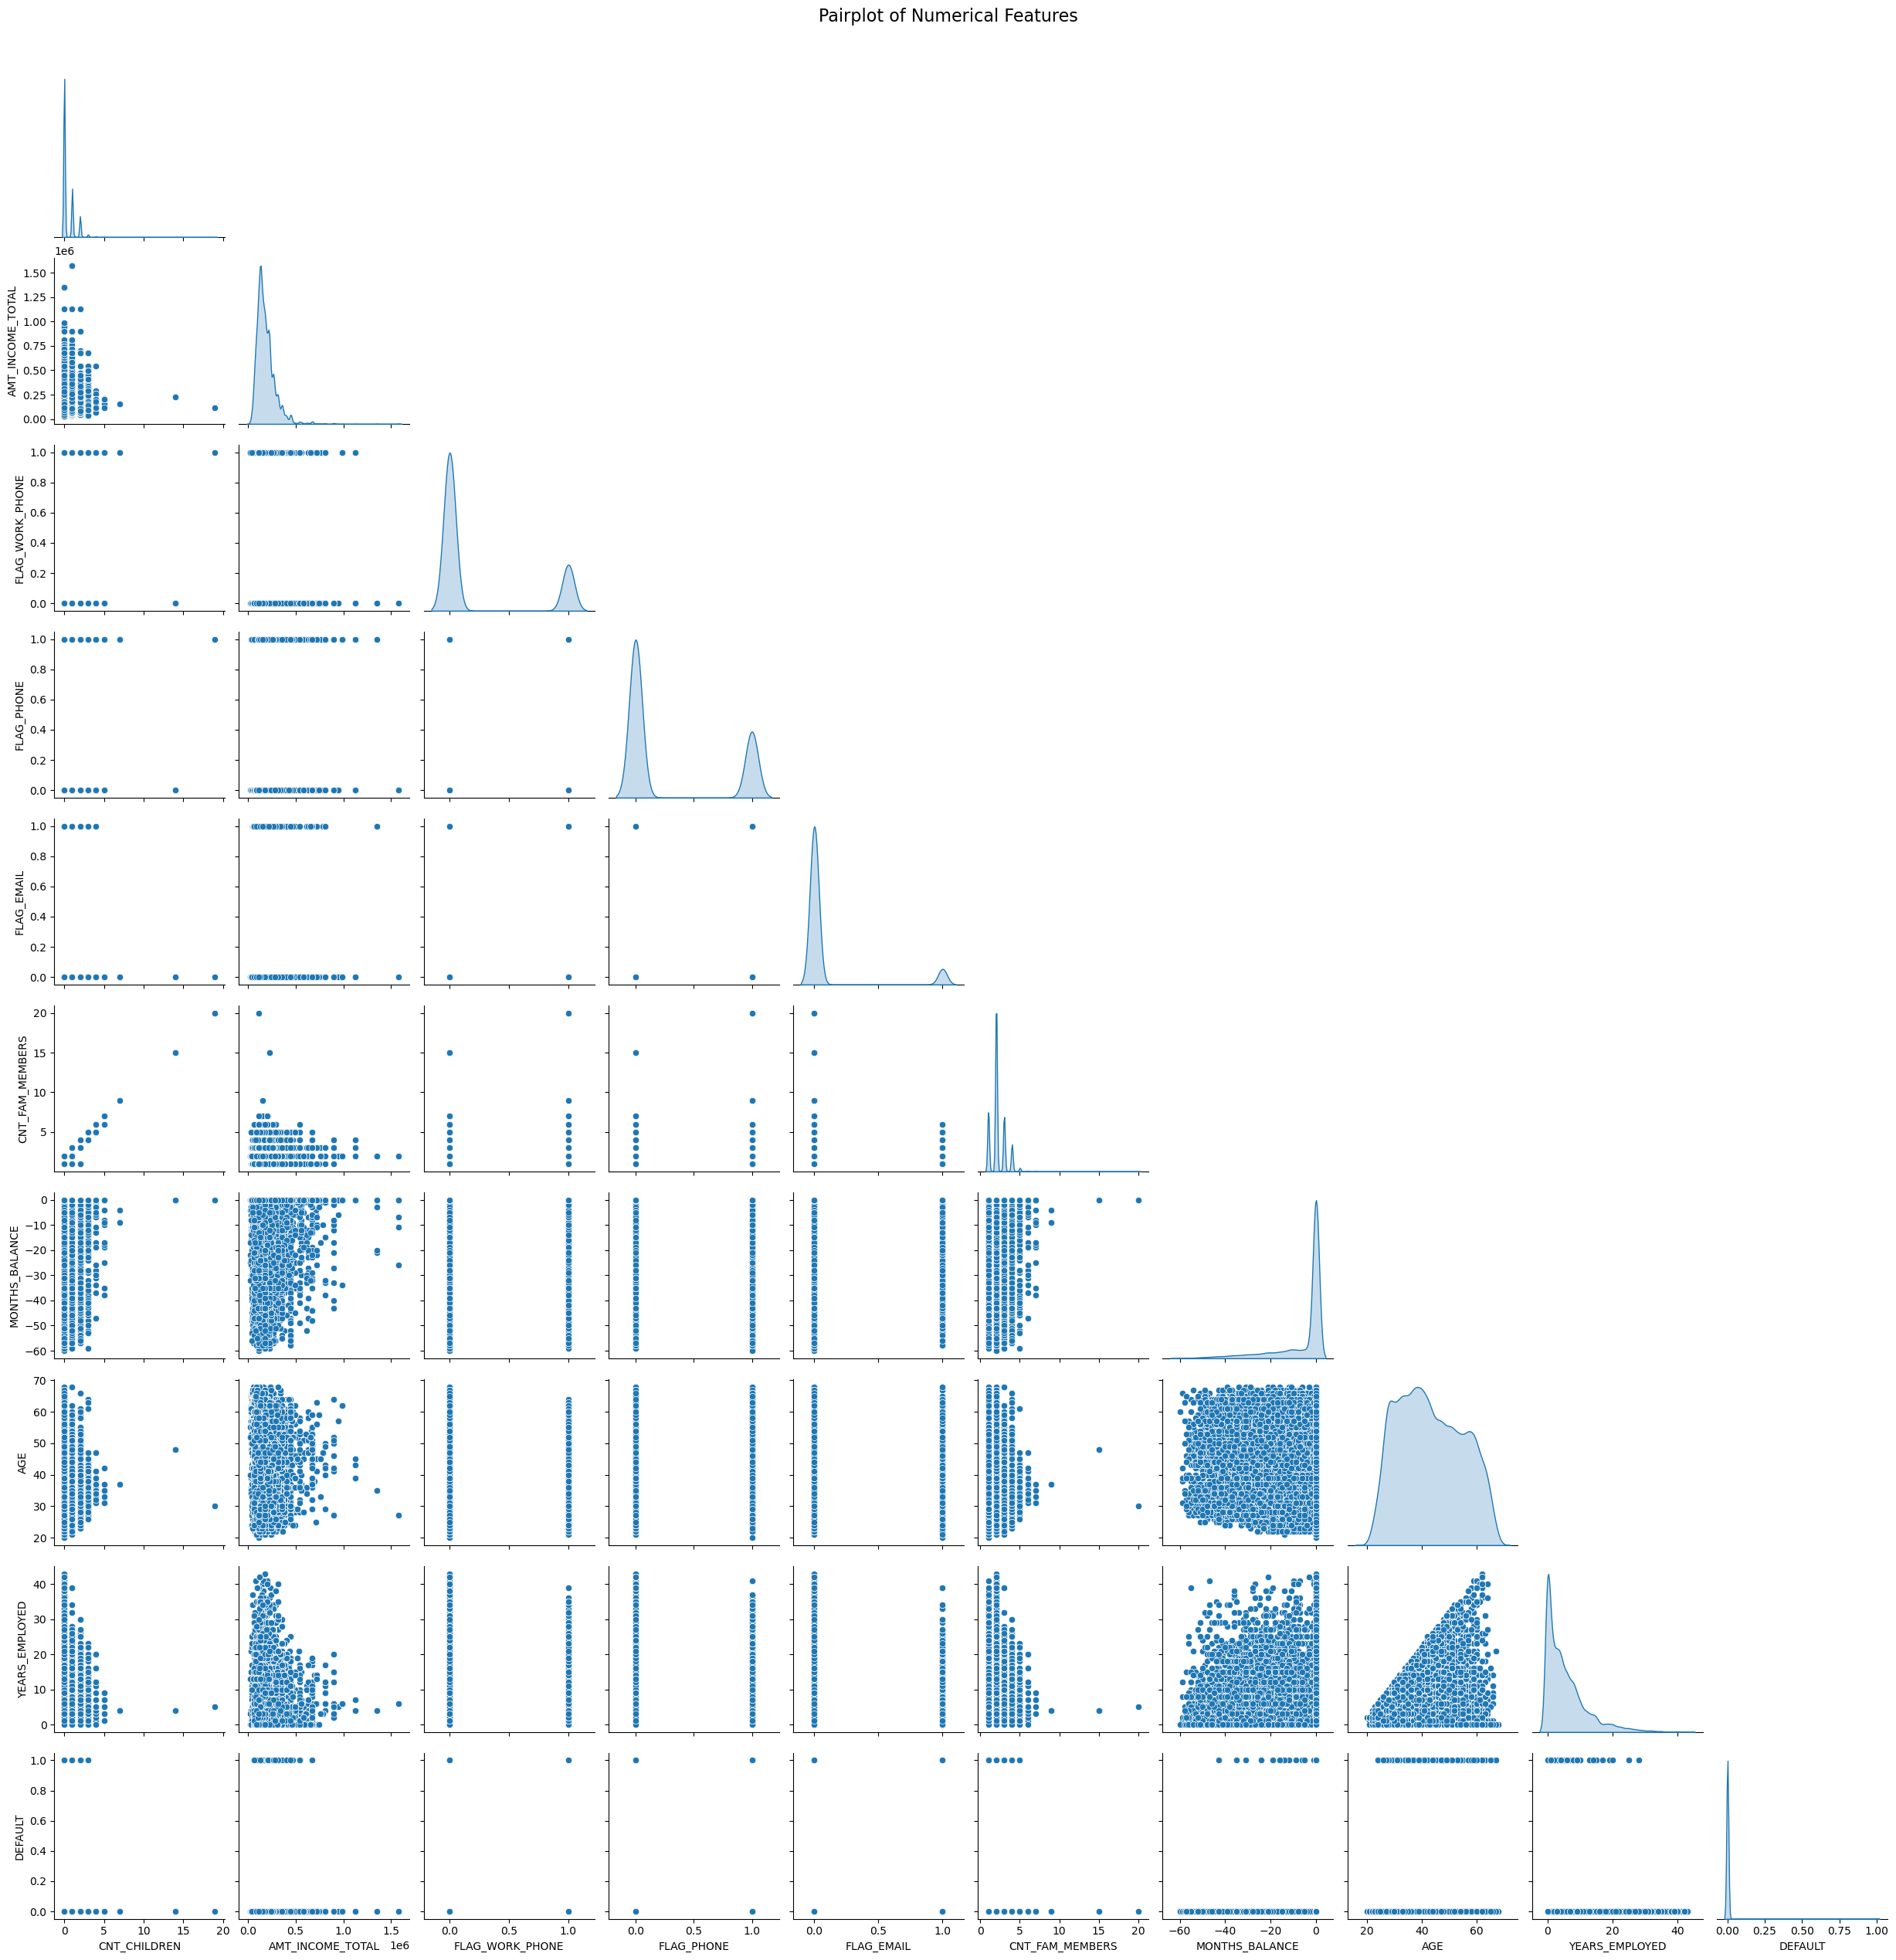

In [105]:
# Select numerical columns
numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns

# Plot the pairplot
sns.pairplot(merged_data[numerical_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show(

In [86]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(merged_data.isnull().sum())


Missing Values in Each Column:
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
AGE                    0
YEARS_EMPLOYED         0
DEFAULT                0
dtype: int64


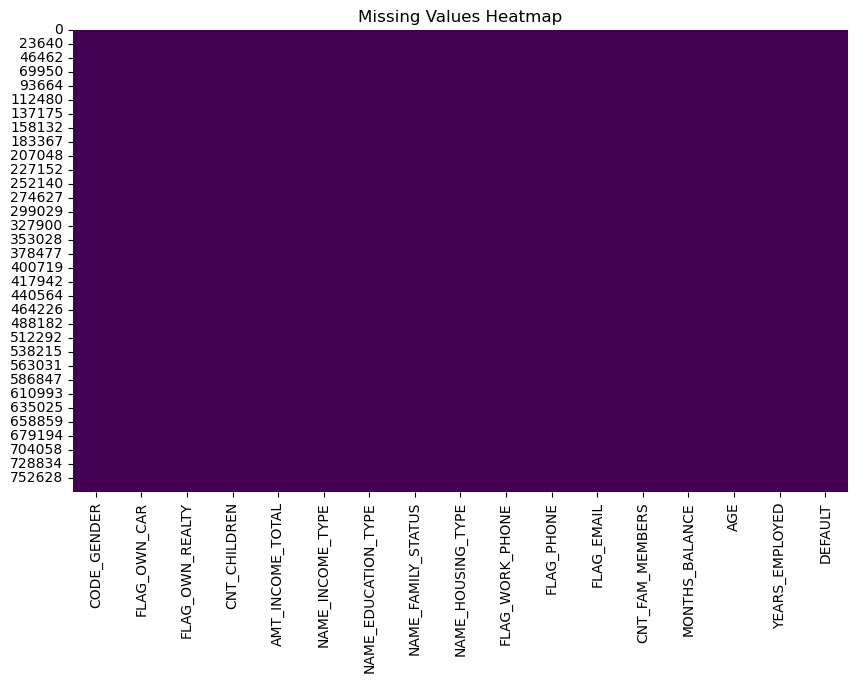

In [92]:
# Visualize missing values in merged_data
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [26]:
# Dropping the column 'OCCUPATION_TYPE'
merged_data = merged_data.drop(columns=['OCCUPATION_TYPE'])
print("Dropped 'OCCUPATION_TYPE' column.")

Dropped 'OCCUPATION_TYPE' column.


In [28]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(merged_data.isnull().sum())


Missing Values in Each Column:
ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


In [30]:
# Check unique values for each column
print("\nUnique Values in Each Column:")
for column in merged_data.columns:
    print(f"{column}: {merged_data[column].nunique()} unique values")


Unique Values in Each Column:
ID: 36457 unique values
CODE_GENDER: 2 unique values
FLAG_OWN_CAR: 2 unique values
FLAG_OWN_REALTY: 2 unique values
CNT_CHILDREN: 9 unique values
AMT_INCOME_TOTAL: 265 unique values
NAME_INCOME_TYPE: 5 unique values
NAME_EDUCATION_TYPE: 5 unique values
NAME_FAMILY_STATUS: 5 unique values
NAME_HOUSING_TYPE: 6 unique values
DAYS_BIRTH: 7183 unique values
DAYS_EMPLOYED: 3640 unique values
FLAG_MOBIL: 1 unique values
FLAG_WORK_PHONE: 2 unique values
FLAG_PHONE: 2 unique values
FLAG_EMAIL: 2 unique values
CNT_FAM_MEMBERS: 10 unique values
MONTHS_BALANCE: 61 unique values
STATUS: 8 unique values


In [31]:
# Check for duplicates in the ID column
if merged_data['ID'].nunique() == len(merged_data):
    print("No duplicates found in the 'ID' column. All IDs are unique.")
else:
    print(f"Duplicates found in the 'ID' column. There are {len(merged_data) - merged_data['ID'].nunique()} duplicate IDs.")

Duplicates found in the 'ID' column. There are 741258 duplicate IDs.


In [34]:
# Drop duplicate rows based on the 'ID' column
merged_data = merged_data.drop_duplicates(subset='ID')

# Verify after dropping duplicates
print("Duplicates removed. Current dataset shape:", merged_data.shape)

Duplicates removed. Current dataset shape: (36457, 19)


In [36]:
# Dropping irrelevant columns
merged_data = merged_data.drop(columns=['ID', 'FLAG_MOBIL'], errors='ignore')
print("Dropped 'ID' and 'FLAG_MOBIL' columns.")

Dropped 'ID' and 'FLAG_MOBIL' columns.


In [38]:
# Convert DAYS_BIRTH to age in years
merged_data['AGE'] = (-merged_data['DAYS_BIRTH']) // 365

# Drop the original DAYS_BIRTH column as it is no longer needed
merged_data = merged_data.drop(columns=['DAYS_BIRTH'])
print("Converted 'DAYS_BIRTH' to 'AGE' and dropped the original column.")

Converted 'DAYS_BIRTH' to 'AGE' and dropped the original column.


In [40]:
# Preview the first few rows of the dataset
print("First 5 rows of the merged dataset:")
print(merged_data.head())

First 5 rows of the merged dataset:
   CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            M            Y               Y             0          427500.0   
16           M            Y               Y             0          427500.0   
31           M            Y               Y             0          112500.0   
61           F            N               Y             0          270000.0   
66           F            N               Y             0          270000.0   

        NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0                Working               Higher education        Civil marriage   
16               Working               Higher education        Civil marriage   
31               Working  Secondary / secondary special               Married   
61  Commercial associate  Secondary / secondary special  Single / not married   
66  Commercial associate  Secondary / secondary special  Single / not married   

  

In [42]:
# Replace positive values in DAYS_EMPLOYED with 0 (indicating unemployment)
merged_data['DAYS_EMPLOYED'] = merged_data['DAYS_EMPLOYED'].apply(lambda x: x if x < 0 else 0)

# Convert DAYS_EMPLOYED to years (negative days to positive years)
merged_data['YEARS_EMPLOYED'] = -merged_data['DAYS_EMPLOYED'] // 365

# Drop the original column
merged_data = merged_data.drop(columns=['DAYS_EMPLOYED'])
print("Simplified: Transformed 'DAYS_EMPLOYED' to 'YEARS_EMPLOYED' and dropped the original column.")

Simplified: Transformed 'DAYS_EMPLOYED' to 'YEARS_EMPLOYED' and dropped the original column.


In [44]:
# Preview the first few rows of the dataset
print("First 5 rows of the merged dataset:")
print(merged_data.head())

First 5 rows of the merged dataset:
   CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            M            Y               Y             0          427500.0   
16           M            Y               Y             0          427500.0   
31           M            Y               Y             0          112500.0   
61           F            N               Y             0          270000.0   
66           F            N               Y             0          270000.0   

        NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0                Working               Higher education        Civil marriage   
16               Working               Higher education        Civil marriage   
31               Working  Secondary / secondary special               Married   
61  Commercial associate  Secondary / secondary special  Single / not married   
66  Commercial associate  Secondary / secondary special  Single / not married   

  

In [46]:
# Simplify STATUS to 'DEFAULT' (1 = Defaulted, 0 = Not Defaulted)
# Defaulted (1): Serious overdue or bad debts ('2', '3', '4', '5')
# Not Defaulted (0): Minor delays, paid off, or no loan ('0', '1', 'C', 'X')
merged_data['DEFAULT'] = merged_data['STATUS'].apply(
    lambda x: 1 if x in ['2', '3', '4', '5'] else 0
)

# Drop the original STATUS column as it's no longer needed
merged_data = merged_data.drop(columns=['STATUS'])

# Print confirmation
print("Simplified 'STATUS' into 'DEFAULT' (1 = Defaulted, 0 = Not Defaulted) and dropped the original column.")

Simplified 'STATUS' into 'DEFAULT' (1 = Defaulted, 0 = Not Defaulted) and dropped the original column.


In [48]:
# Initialize a dictionary to store label encoders
label_encoders = {}

# Encode all object (categorical) columns in the dataset
for column in merged_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    merged_data[column] = le.fit_transform(merged_data[column])
    label_encoders[column] = le  # Save the encoder for potential inverse transformation

print("Encoded all categorical variables using LabelEncoder.")

Encoded all categorical variables using LabelEncoder.


In [50]:
# Preview the first few rows of the dataset
print("First 5 rows of the merged dataset:")
print(merged_data.head())

First 5 rows of the merged dataset:
    CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0             1             1                1             0   
16            1             1                1             0   
31            1             1                1             0   
61            0             0                1             0   
66            0             0                1             0   

    AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0           427500.0                 4                    1   
16          427500.0                 4                    1   
31          112500.0                 4                    4   
61          270000.0                 0                    4   
66          270000.0                 0                    4   

    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_WORK_PHONE  FLAG_PHONE  \
0                    0                  4                1           0   
16                   0                  4           

In [52]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features (excluding the target column 'DEFAULT')
X = merged_data.drop(columns=['DEFAULT'])  # Features
y = merged_data['DEFAULT']  # Target

# Apply scaling
X_scaled = scaler.fit_transform(X)

print("Scaling applied to the dataset.")

Scaling applied to the dataset.


In [54]:
# Define features (X) and target (y)
X = merged_data.drop(columns=['DEFAULT'])  # All columns except the target
y = merged_data['DEFAULT']  # Target column
print("Features (X) and Target (y) defined successfully.")

Features (X) and Target (y) defined successfully.


In [56]:
# Splitting the scaled dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (29165, 16)
Test set size: (7292, 16)


In [58]:
# Applying SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [60]:
# Print shapes to verify resampling
print("Training features shape after SMOTE:", X_train_resampled.shape)
print("Training target shape after SMOTE:", y_train_resampled.shape)

Training features shape after SMOTE: (58160, 16)
Training target shape after SMOTE: (58160,)


In [62]:
# Verify train-test split sizes
print(f"Original training set size: {X_train.shape}")
print(f"Original test set size: {X_test.shape}")

Original training set size: (29165, 16)
Original test set size: (7292, 16)


In [64]:
# Verify the number of features and samples after SMOTE
print(f"Training features shape after SMOTE: {X_train_resampled.shape}")
print(f"Training target shape after SMOTE: {y_train_resampled.shape}")

Training features shape after SMOTE: (58160, 16)
Training target shape after SMOTE: (58160,)


In [66]:
# Check class distribution in the original training set
print("Class distribution in original training set (before SMOTE):")
print(y_train.value_counts())

Class distribution in original training set (before SMOTE):
DEFAULT
0    29080
1       85
Name: count, dtype: int64


In [68]:
# Check class distribution in the resampled training set
print("\nClass distribution in resampled training set (after SMOTE):")
print(y_train_resampled.value_counts())


Class distribution in resampled training set (after SMOTE):
DEFAULT
0    29080
1    29080
Name: count, dtype: int64


In [70]:
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=200),
        'params': {'C': [0.1, 1], 'solver': ['liblinear']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [3, 5], 'min_samples_split': [2, 5]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100], 'max_depth': [5, 10]}
    }
}

In [72]:
# Initialize results dictionary to store evaluation metrics
results = {}
best_tree_model = None

for model_name, config in param_grids.items():
    print(f"Tuning {model_name}...")
    
    # GridSearchCV setup and fitting
    grid_search = GridSearchCV(
        config['model'], 
        config['params'], 
        cv=5, 
        scoring='roc_auc'
    )
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Save the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Save the best Decision Tree for visualization
    if model_name == 'Decision Tree':
        best_tree_model = best_model

    # Calculate metrics
    metrics = {
        'Best Parameters': grid_search.best_params_,
        'CV AUC': grid_search.best_score_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1),
        'F1 Score': f1_score(y_test, y_pred, pos_label=1),
    }
    if y_proba is not None:
        metrics['ROC AUC'] = roc_auc_score(y_test, y_proba)
    
    results[model_name] = metrics

Tuning Logistic Regression...
Tuning Decision Tree...
Tuning Random Forest...


In [73]:
# Display results for each model
print("Model Performance Metrics:\n")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print("\n")

Model Performance Metrics:

Model: Logistic Regression
  Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
  CV AUC: 0.6794474469470928
  Accuracy: 0.5804991771804717
  Precision: 0.005855562784645413
  Recall: 0.8571428571428571
  F1 Score: 0.011631663974151859
  ROC AUC: 0.7592261495438499


Model: Decision Tree
  Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
  CV AUC: 0.7813477536237368
  Accuracy: 0.4924574876577071
  Precision: 0.0037756202804746495
  Recall: 0.6666666666666666
  F1 Score: 0.007508715473317243
  ROC AUC: 0.6479720481233341


Model: Random Forest
  Best Parameters: {'max_depth': 10, 'n_estimators': 50}
  CV AUC: 0.9984592703285913
  Accuracy: 0.9370543060888645
  Precision: 0.013333333333333334
  Recall: 0.2857142857142857
  F1 Score: 0.025477707006369428
  ROC AUC: 0.6794866757045275




In [74]:
# Compare key metrics like ROC AUC and F1 Score
best_model_name = max(results, key=lambda x: results[x]['ROC AUC'])
print(f"The best model based on ROC AUC is: {best_model_name}")

The best model based on ROC AUC is: Logistic Regression


Displaying the best Decision Tree model...


C:\Users\rishi\OneDrive\Documents\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\rishi\OneDrive\Documents\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\rishi\OneDrive\Documents\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


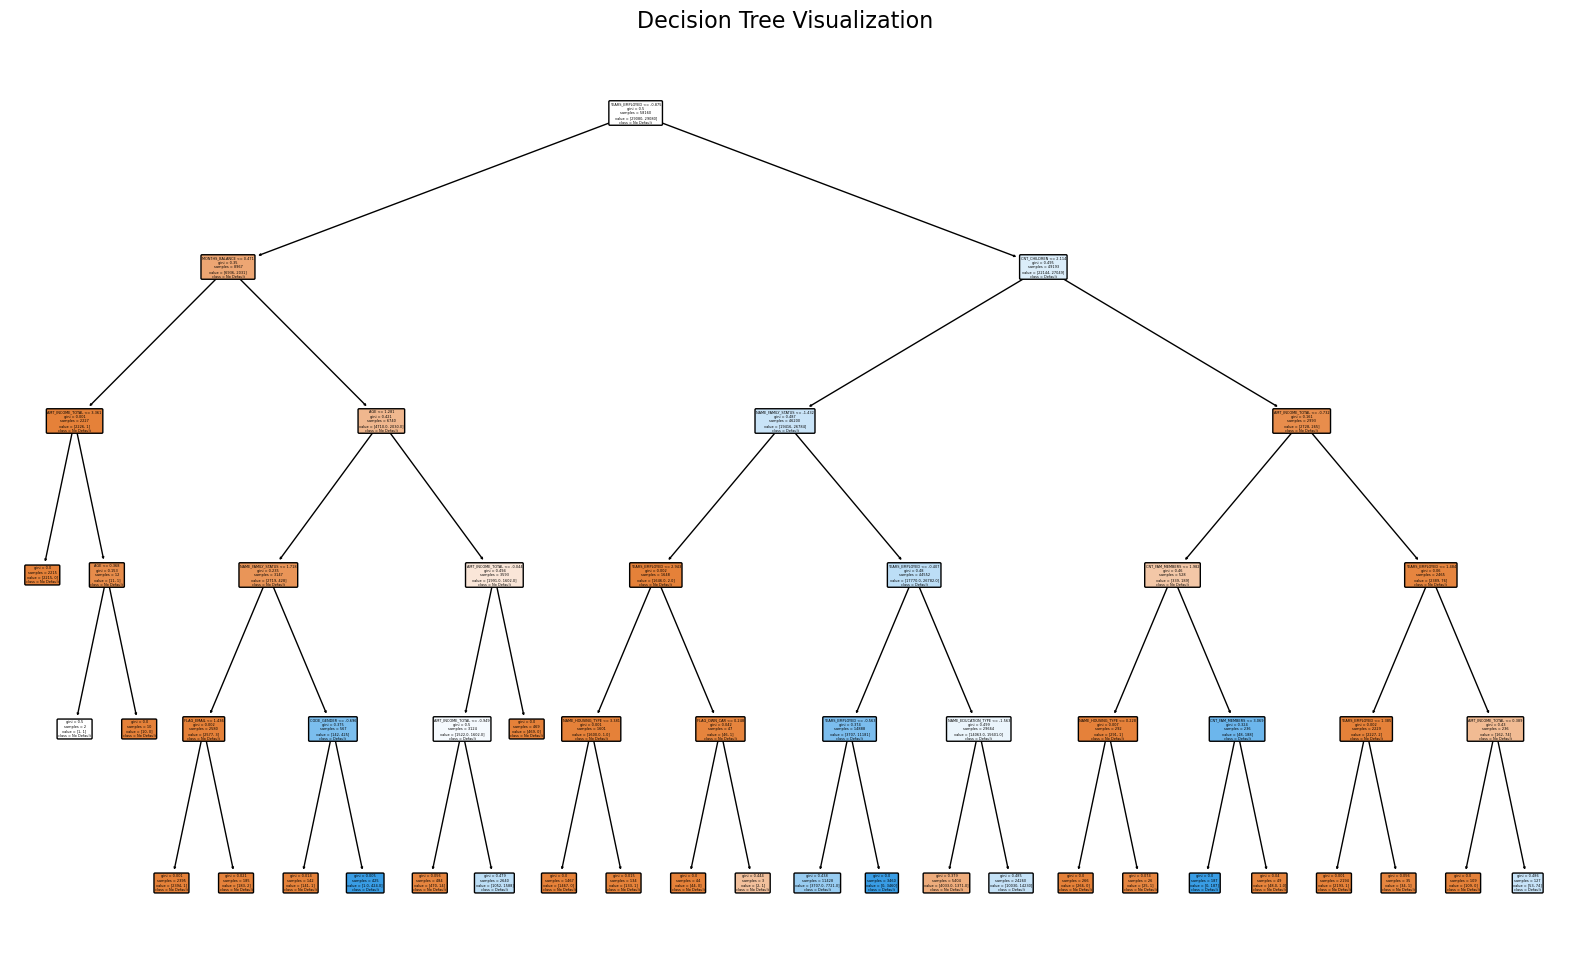

In [75]:
# Visualizing the Decision Tree
if 'best_tree_model' in locals() and best_tree_model is not None:
    print("Displaying the best Decision Tree model...")
    
    # Create the figure
    plt.figure(figsize=(20, 12))  # Increased size for better visualization
    
    # Plot the tree
    plot_tree(
        best_tree_model,
        feature_names=X.columns.tolist(),  # Ensure feature names are passed correctly
        class_names=["No Default", "Default"],  # Provide clear class names
        filled=True,  # Color-coded nodes
        rounded=True  # Rounded edges for improved readability
    )
    
    # Title and formatting
    plt.title("Decision Tree Visualization", fontsize=16)
    plt.axis("off")  # Remove axis for a cleaner view
    plt.show()
else:
    print("Error: Best Decision Tree model is not defined or available.")

In [82]:
# Evaluate the Decision Tree
y_pred = best_tree_model.predict(X_test)
y_proba = best_tree_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score for Decision Tree: {roc_auc}")

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66      7271
           1       0.00      0.67      0.01        21

    accuracy                           0.49      7292
   macro avg       0.50      0.58      0.33      7292
weighted avg       1.00      0.49      0.66      7292

ROC AUC Score for Decision Tree: 0.6479720481233341
